In [1]:
#DATA WRANGLING

#importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy as sp

#importing data
df = pd.read_csv(r'C:\Users\qakan\Downloads\auto.csv', header = None)

#add headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head(10)

#replace the ? with NaN

df1=df.replace("?",np.NaN, inplace = True)

#drop missing values on the price column
#df=df1.dropna(subset=["price"], axis=0)

#exploring the dataframe
#print(df.dtypes)
#df.describe(include="all")
#df.info()

#identify missing values

missing_data=df.isnull()
#missing_data.head(5)

#count missing attributes per column
#for column in missing_data.columns.values.tolist():
    #print(column)
    #print (missing_data[column].value_counts())
    #print("")  

#replace missing numerical data with mean, missing categorical data with mode
#and drop the missing price data as that is the target variable and rows with missing price data is useless

#calculating mean value for the numerical columns

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_stroke= df["stroke"].astype("float").mean(axis=0)
avg_bore=df["bore"].astype("float").mean(axis=0)
avg_horsepower=df["horsepower"].astype("float").mean(axis=0)
avg_peakrpm=df["peak-rpm"].astype("float").mean(axis=0)

#replacing missing numerical values with the mean
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)


#calculate the mode for categorical values
mode_num_of_doors= df["num-of-doors"].value_counts().idxmax()

#replacing the missing categorical values with the mode
df["num-of-doors"].replace(np.nan, mode_num_of_doors, inplace=True)

#drop rows with missing price data

df.dropna(subset=["price"], axis=0, inplace=True)

#reset index after dropping rows
df.reset_index(drop=True, inplace=True)

#convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.head()
print(df.columns.tolist())

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [2]:
#DATA STANDARDIZATION

#transform mpg-based columns to L/100km
df['highway-mpg']=235/df['highway-mpg']
df["city-mpg"]=235/df["city-mpg"]

#rename column to reflect change 
df.rename(columns={'highway-mpg':"highway-L/100km"},inplace=True)
df.rename(columns={"city-mpg":"city-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


In [3]:
#DATA NORMALIZATION
#Using simple feature scaling to normalize length, width and height column
df["length"]=df["length"]/df["length"].max()
df["width"]=df["width"]/df["width"].max()
df["height"]=df["height"]/df["height"].max()

df[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Text(0.5, 1.0, 'horsepower bins')

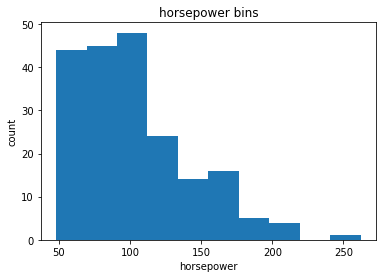

In [4]:
#BINNING
#transform categorical value to bins using 'cut' for grouped analysis
from matplotlib import pyplot
df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

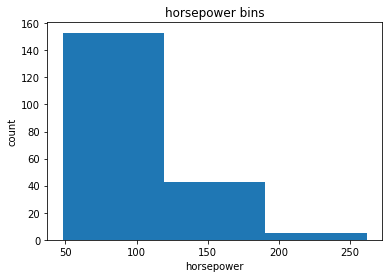

In [5]:
#BINNING CONT'D
#make 3 equal length bins 
bins=np.linspace(min(df["horsepower"]),max(df["horsepower"]), 4)
#set group names
group_names = ["Low", "Medium", "High"]
#move data into appropriate bins
df["horsepower-binned"]=pd.cut(df["horsepower"],bins, labels=group_names, include_lowest=True)

#plot the bin
plt.pyplot.hist(df["horsepower"], bins = 3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [6]:
#CREATING INDICATOR VARIABLES
#indicator variables for the fuel-type and aspiration columns
dummy_var1=pd.get_dummies(df["fuel-type"])
dummy_var2=pd.get_dummies(df["aspiration"])

#merge dummy_var to the main dataframe
df=pd.concat([df,dummy_var1],axis=1)
df=pd.concat([df, dummy_var2],axis=1)

#remove original fuel-type column
df.drop("fuel-type",axis=1, inplace=True)
df.drop("aspiration",axis=1,inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [7]:
#CORRELATION
#find correlation between columns: bore, stroke, compression-ratio and horsepower

df[["bore",'stroke', 'compression-ratio','horsepower']].corr()
df[["engine-size", "price"]].corr()
df[['highway-L/100km', 'price']].corr()
df[['peak-rpm', 'price']].corr()
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

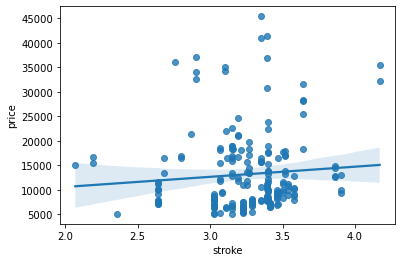

In [8]:
#plot correlation chart
sns.regplot(x="stroke", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

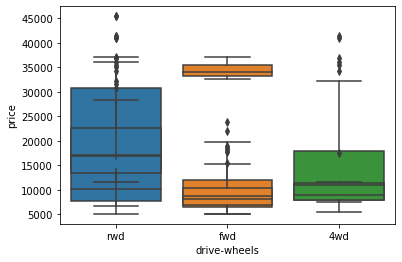

In [9]:
#chart boxplot for categorical variables
sns.boxplot(x="body-style", y="price", data=df)
sns.boxplot(x="engine-location", y="price", data=df)
sns.boxplot(x="drive-wheels", y="price", data=df)

In [10]:
#DESCRIPTIVE STATISTICAL ANALYSIS
#describe data
df.describe(include=["object"])

#value counts to see if the drive wheel column is a good predictor for price
#if count is skewed, then the column will not be a good predictor variable to use
drive_wheels_counts = df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive_wheels":"value_counts"}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'

#grouping
#see how many categories the drive wheel column has
df["drive-wheels"].unique()

#calculate the most valuable drive wheel type
#assign group
df_group_one = df[["drive-wheels", "body-style", "price"]]

#group by drive-wheel
df_group_one=df_group_one.groupby(["drive-wheels"], as_index=False).mean()
df_group_one

#group results to prepare for visualization
df_gptest = df[["drive-wheels", "body-style", "price"]]
grouped_test1=df_gptest.groupby(['drive-wheels'], as_index=False).mean()
grouped_test1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [14]:
#CORRELATION AND CAUSATION
#correlation and p-value of columns
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20
The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48
The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158759e-30
The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38
The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893816e-53
The Pearson Correlation Coefficient is 0.8723351674455186  with a P-value of P = 9.265491622197335e-64
The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


In [15]:
#ANOVA
#analyse difference between different groups of the same variable
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)
grouped_test2.get_group('4wd')['price']
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23
ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333
ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666
